### 1. Basic Probability


In [1]:
import numpy as np

In [2]:
# cau 1
def compute_mean(X):
    return np.mean(X)


X = [2, 0, 2, 2, 7, 4, -2, 5, -1, -1]
print('Mean: ', compute_mean(X))

Mean:  1.8


In [3]:
def compute_median(X):
    size = len(X)
    X = np.sort(X)
    print(X)
    if size % 2 == 0:
        return (X[size//2 - 1] + X[size//2]) / 2
    else:
        return X[(size + 1)//2 - 1]


X = [1, 5, 4, 4, 9, 13]
print('Median: ', compute_median(X))

[ 1  4  4  5  9 13]
Median:  4.5


In [4]:
def compute_std(X):
    mean = compute_mean(X)
    variance = 0
    for x in X:
        variance += (mean - x)**2
    variance = variance / len(X)
    return np.sqrt(variance)


X = [171, 176, 155, 167, 169, 182]
print(compute_std(X))

8.32666399786453


In [5]:
def compute_correlation_coefficient(X, Y):
    N = len(X)
    numerator = N*np.sum(X * Y) - np.sum(X)*np.sum(Y)
    denominator = np.sqrt(N*np.sum(X**2) - np.sum(X)**2) * \
        np.sqrt(N*np.sum(Y**2) - np.sum(Y)**2)
    return np.round(numerator / denominator, 2)


X = np.asarray([-2, -5, -11, 6, 4, 15, 9])
Y = np.asarray([4, 25, 121, 36, 16, 225, 81])
print('Correlation: ', compute_correlation_coefficient(X, Y))

Correlation:  0.42


### 2. Tabular data analysis


In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('advertising.csv')


def correlation(x, y):
    return compute_correlation_coefficient(x, y)


x = data['TV']
y = data['Radio']
corr_xy = correlation(x, y)
print(f" Correlation between TV and Sales : { round ( corr_xy , 2)}")

 Correlation between TV and Sales : 0.05


In [8]:
data = pd.read_csv("advertising.csv")


def correlation(x, y):
    return compute_correlation_coefficient(x, y)


features = ['TV', 'Radio', 'Newspaper']

for feature_1 in features:
    for feature_2 in features:
        correlation_value = correlation(data[feature_1], data[feature_2])
        print(
            f" Correlation between {feature_1} and {feature_2}: {round(correlation_value, 2)}")

 Correlation between TV and TV: 1.0
 Correlation between TV and Radio: 0.05
 Correlation between TV and Newspaper: 0.06
 Correlation between Radio and TV: 0.05
 Correlation between Radio and Radio: 1.0
 Correlation between Radio and Newspaper: 0.35
 Correlation between Newspaper and TV: 0.06
 Correlation between Newspaper and Radio: 0.35
 Correlation between Newspaper and Newspaper: 1.0


In [9]:
# cau 7
data = pd.read_csv('advertising.csv')
x = data['Radio']
y = data['Newspaper']
result = np.corrcoef(x, y)
print(result)

[[1.         0.35410375]
 [0.35410375 1.        ]]


In [10]:
# cau 8
data = pd.read_csv('advertising.csv')
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


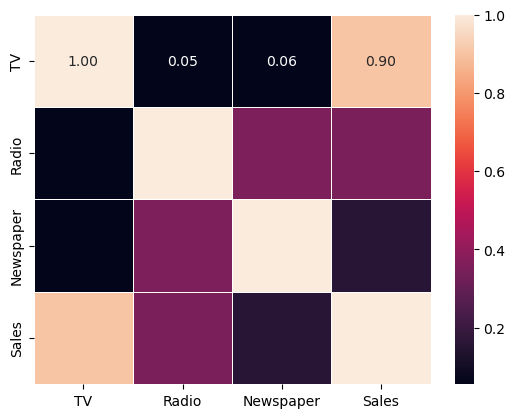

In [11]:
# cau 9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('advertising.csv')
data_corr = data.corr()
sns.heatmap(data_corr, annot=True, fmt=".2f", linewidth=.5)
plt.show()

### 3. Text Retrieval


In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vi_data_df = pd.read_csv('vi_text_retrieval.csv')
context = vi_data_df['text']
context = [doc.lower() for doc in context]

tfidf_vectorizer = TfidfVectorizer()
context_embedded = tfidf_vectorizer.fit_transform(context)
context_embedded.toarray()[7][0]

0.31126580760710637

In [14]:
def tfidf_search(question, tfidf_vectorizer, top_d=5):
    question = question.lower()
    query_embedded = tfidf_vectorizer.transform([question])
    cosine_scores = cosine_similarity(query_embedded, context_embedded).reshape((-1,))

    # Get top k cosine score and index its
    results = []
    for idx in cosine_scores.argsort()[-top_d:][::-1]:
        doc_score = {
            'id': idx, 
            'cosine_score': cosine_scores[idx]
        }
        results.append(doc_score)
    return results


question = vi_data_df.iloc[0]['question']
results = tfidf_search(question, tfidf_vectorizer, top_d=5)
print(results)
results[0]['cosine_score']

[{'id': 0, 'cosine_score': 0.6279910475266974}, {'id': 97, 'cosine_score': 0.2114579586225163}, {'id': 136, 'cosine_score': 0.17714753149794465}, {'id': 384, 'cosine_score': 0.15971218395887335}, {'id': 118, 'cosine_score': 0.1578067474650028}]


0.6279910475266974

In [15]:
def corr_search(question, tfidf_vectorizer, top_d=5):
    query_embedded = tfidf_vectorizer.transform([question.lower()])
    corr_scores = np.corrcoef(query_embedded.toarray(), 
                              context_embedded.toarray()) # query_embedded đứng trước context_embedded để dễ lấy corr_scores
                                                          # của query với context_embedded
    corr_scores = corr_scores[0][1:]

    # Get top k correlation score and index its
    results = []
    for idx in corr_scores.argsort()[-top_d:][::-1]:
        doc = {
            'id': idx, 
            'cosine_score': corr_scores[idx]
        }
        results.append(doc)
    return results


question = vi_data_df.iloc[0]['question']
results = corr_search(question, tfidf_vectorizer, top_d=5)
results[1]['cosine_score']

0.20734246471973164